In [3]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [5]:
food_price_df = pd.read_csv("C:\\Users\\HomePC\\Desktop\\my_project\\food price in nidegiria\\nig_food_price_2007_to_2025(clean).csv")

In [9]:
food_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13542 entries, 0 to 13541
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ISO3                        13542 non-null  object 
 1   country                     13542 non-null  object 
 2   state                       13542 non-null  object 
 3   local_govt                  13542 non-null  object 
 4   market_name                 13542 non-null  object 
 5   lat                         13320 non-null  float64
 6   lon                         13320 non-null  float64
 7   geo_id                      13542 non-null  object 
 8   price_date                  13542 non-null  object 
 9   year                        13542 non-null  int64  
 10  month                       13542 non-null  object 
 11  currency                    13542 non-null  object 
 12  components                  13542 non-null  object 
 13  start_dense_data            135

In [15]:
# pick out columns to be use for the analysis
food_price_data_df = food_price_df[['price_date','state','market_name','bread','cassava_meal',
                                    'cowpeas','gari','groundnuts','maize','rice','sorghum','yam']]
food_price_data_df

,price_date,state,market_name,bread,cassava_meal,cowpeas,gari,groundnuts,maize,rice,sorghum,yam
0,1/1/2007,Abia,Aba,73.2175,10096.7775,10927.9175,6947.3150,24707.1200,3026.9925,341.0200,3581.4375,152.2525
1,2/1/2007,Abia,Aba,72.2450,10107.6475,10902.3975,6937.6550,24800.9650,3049.6700,337.2950,3606.9975,151.2600
2,3/1/2007,Abia,Aba,71.3850,10096.6525,10730.5825,6874.6900,24798.9775,3016.4550,335.9275,3558.7075,150.9675
3,4/1/2007,Abia,Aba,75.1175,9999.2800,10586.8925,6850.6875,24305.2050,3010.2950,343.1650,3552.1750,154.9700
4,5/1/2007,Abia,Aba,69.8175,10071.5050,10743.7775,6870.2925,24921.2300,3031.5275,337.6275,3563.9050,151.5375
...,...,...,...,...,...,...,...,...,...,...,...,...
13537,2/1/2025,Market Average,Market Average,285.7375,42133.3625,6838.7375,24024.8325,47241.2650,29826.7050,5457.4500,37135.6625,3371.1525
13538,3/1/2025,Market Average,Market Average,280.6150,42231.4700,6945.4225,24102.1025,47885.4525,29833.5700,5343.9500,37183.1350,3326.5025
13539,4/1/2025,Market Average,Market Average,265.4625,42383.2000,6592.9350,23665.5950,48401.6650,29889.8625,5355.3325,36740.2500,3432.6100
13540,5/1/2025,Market Average,Market Average,268.3675,43056.5450,6374.1700,23780.1300,48755.8375,30218.6250,5442.9400,37143.9300,3534.3725


In [19]:
# convert price_date to date format
food_price_data_df['price_date'] = pd.to_datetime(food_price_data_df['price_date'])

In [20]:
food_price_data_df = food_price_data_df.sort_values(by = 'price_date')
food_price_data_df

,price_date,state,market_name,bread,cassava_meal,cowpeas,gari,groundnuts,maize,rice,sorghum,yam
0,2007-01-01,Abia,Aba,73.2175,10096.7775,10927.9175,6947.3150,24707.1200,3026.9925,341.0200,3581.4375,152.2525
10656,2007-01-01,Borno,Monguno,91.9175,10269.5400,12111.7550,7430.7825,26971.5425,3699.8150,448.4925,3412.4125,151.4150
10434,2007-01-01,Borno,Monday,93.9000,10586.5825,12259.3650,7593.2850,27200.3275,3742.6050,462.8175,3496.1200,147.8225
2664,2007-01-01,Yobe,Bursari,82.6800,10224.6275,10448.3025,7385.0525,24755.4825,3415.9275,407.9050,3038.1975,133.6650
7992,2007-01-01,Zamfara,Kaura Namoda,134.5250,8639.0850,11408.7350,6469.4975,23507.3600,3517.4300,423.1575,3580.6875,114.3750
...,...,...,...,...,...,...,...,...,...,...,...,...
443,2025-06-01,Borno,Abba Gamaram,389.7400,40607.2700,3561.9025,21182.2000,39303.9600,26373.4025,8914.8975,24358.6600,3253.1025
13541,2025-06-01,Market Average,Market Average,224.6950,42921.3800,6393.2150,23318.8375,51224.9225,30219.6375,5177.9325,36681.0475,3457.8950
5549,2025-06-01,Yobe,Geidam,178.8475,36603.0325,4022.5775,18508.4150,47905.5325,23238.7750,4552.5300,20593.0450,3940.0150
887,2025-06-01,Borno,Baga Road,187.9425,38835.5075,4210.6275,19095.7025,52788.7825,25936.8300,5234.0375,23968.2850,3334.6325


In [61]:
# filter data by state and market
selected_state = 'Borno'
selected_market = 'Monday'
state_data = food_price_data_df[
                                (food_price_data_df['state'] == selected_state) & 
                                (food_price_data_df['market_name'] == selected_market)
                                 ]
state_data

,price_date,state,market_name,bread,cassava_meal,cowpeas,gari,groundnuts,maize,rice,sorghum,yam
10434,2007-01-01,Borno,Monday,93.9000,10586.5825,12259.3650,7593.2850,27200.3275,3742.6050,462.8175,3496.1200,147.8225
10435,2007-02-01,Borno,Monday,92.9075,10631.3800,12540.3850,7585.1725,27258.8750,3763.7875,457.6075,3512.4825,149.4600
10436,2007-03-01,Borno,Monday,90.5250,10595.0375,12319.7200,7551.9175,27193.4025,3709.4200,451.1725,3452.5575,147.5275
10437,2007-04-01,Borno,Monday,92.2850,10641.2250,12145.3625,7573.8300,26978.7675,3709.1550,455.3850,3466.4200,150.8100
10438,2007-05-01,Borno,Monday,92.2650,10581.3225,12302.9750,7587.4175,27165.6375,3754.7550,454.6675,3506.3275,152.6050
...,...,...,...,...,...,...,...,...,...,...,...,...
10651,2025-02-01,Borno,Monday,438.7600,38655.4025,4098.4000,21173.0100,37781.3075,25636.6575,8750.0000,24525.9775,2450.0000
10652,2025-03-01,Borno,Monday,419.2350,38710.9750,4063.8325,21127.5075,38124.2500,25481.2050,8374.3200,24295.8150,2525.8075
10653,2025-04-01,Borno,Monday,380.3025,38798.4975,3962.5225,20796.3725,39249.6400,25439.1550,7700.0000,24002.0125,2850.0000
10654,2025-05-01,Borno,Monday,268.9700,39359.5675,3959.6225,19860.9000,45797.8525,25621.4775,6719.3825,23940.4175,3056.9650


In [63]:
# normalize data 
def normalize(df):
  x = df.copy()
  for i in x.columns[3:]:
    x[i] = x[i]/x[i].iloc[0]
  return x

In [64]:
normalize(state_data)

,price_date,state,market_name,bread,cassava_meal,cowpeas,gari,groundnuts,maize,rice,sorghum,yam
10434,2007-01-01,Borno,Monday,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10435,2007-02-01,Borno,Monday,0.989430,1.004232,1.022923,0.998932,1.002152,1.005660,0.988743,1.004680,1.011077
10436,2007-03-01,Borno,Monday,0.964058,1.000799,1.004923,0.994552,0.999745,0.991133,0.974839,0.987540,0.998004
10437,2007-04-01,Borno,Monday,0.982801,1.005161,0.990701,0.997438,0.991855,0.991062,0.983941,0.991505,1.020210
10438,2007-05-01,Borno,Monday,0.982588,0.999503,1.003557,0.999227,0.998725,1.003246,0.982390,1.002920,1.032353
...,...,...,...,...,...,...,...,...,...,...,...,...
10651,2025-02-01,Borno,Monday,4.672630,3.651358,0.334308,2.788386,1.389002,6.849950,18.905940,7.015199,16.573932
10652,2025-03-01,Borno,Monday,4.464696,3.656607,0.331488,2.782394,1.401610,6.808414,18.094216,6.949365,17.086759
10653,2025-04-01,Borno,Monday,4.050080,3.664875,0.323224,2.738785,1.442984,6.797179,16.637227,6.865329,19.279880
10654,2025-05-01,Borno,Monday,2.864430,3.717873,0.322988,2.615587,1.683724,6.845894,14.518428,6.847710,20.679971


In [59]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[3:]:
    fig.add_scatter(x = df['price_date'], y = df[i], name = i)
  fig.show()

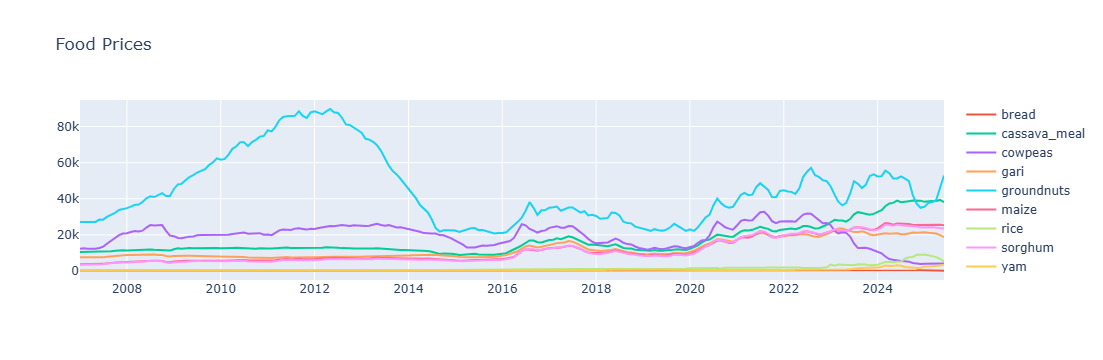

In [60]:
interactive_plot(state_data, 'Food Prices')